# Real Estate File Processing

Here we load the real estate file, which has 22,213 entries and 90 variables. The following commented out chunk was written by Chui, and adds the two variables for latitude and longitude. 

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [255]:
#real_estate = pd.read_csv('data/Ames Real Estate Data.csv', index_col=0)
#real_estate
#real_estate.head()
real_estate.columns

Index(['GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr', 'ZngCdSc',
       'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr', 'SchD_S',
       'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2', 'MA_City',
       'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo', 'Inst1_No',
       'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S', 'OthAc_S',
       'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D', 'X2TSc_D',
       'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S', 'ImpAcX1S',
       'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S', 'AcreX_S1',
       'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType', 'BldgNo_S',
       'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle', 'Foundation',
       'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating', 'Central Air',
       'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea',
       'GarageType', 'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY',
       'MoSold_MM', 'SalePrice', 

In [256]:
# import pandas as pd
# from geopy.geocoders import Nominatim
# from geopy.exc import GeocoderTimedOut, GeocoderQuotaExceeded, GeocoderServiceError
# from tqdm import tqdm
# import concurrent.futures
# import time
# from geopy.exc import GeocoderInsufficientPrivileges

# # Initialize the geolocator with a more descriptive user_agent
# geolocator = Nominatim(user_agent="AmesIowaRealEstateGeocoder")

# def process_chunk(address_chunk):
#     latitudes = []
#     longitudes = []
#     for address in address_chunk:
#         lat, lon = get_lat_lon(address)
#         latitudes.append(lat)
#         longitudes.append(lon)
#         # Introduce delay between each address in the chunk
#         time.sleep(1)
#     return latitudes, longitudes

# # Get the 'Prop_Addr' column from your dataset
# addresses = real_estate['Prop_Addr']

# def get_lat_lon(address):
#     address = str(address)  # Convert address to string.
#     attempts = 3  # number of retry attempts
#     for attempt in range(attempts):
#         try:
#             location = geolocator.geocode(address + ", Ames, Iowa", timeout=10)
#             if location:
#                 return location.latitude, location.longitude
#             else:
#                 return None, None
#         except (GeocoderTimedOut, GeocoderServiceError, GeocoderQuotaExceeded, GeocoderInsufficientPrivileges):
#             if attempt < attempts - 1:
#                 # Exponential backoff for retries, starting with 2 seconds
#                 time.sleep(2 ** attempt)
#                 continue
#             else:
#                 raise

# # Using tqdm for a progress bar and concurrent.futures to speed up the process
# chunks = [addresses[i:i+100] for i in range(0, len(addresses), 100)]
# all_latitudes = []
# all_longitudes = []

# # Decrease max_workers to reduce the number of concurrent requests
# with concurrent.futures.ThreadPoolExecutor(max_workers=1) as executor:
#     for lat_chunk, lon_chunk in tqdm(executor.map(process_chunk, chunks), total=len(chunks)):
#         all_latitudes.extend(lat_chunk)
#         all_longitudes.extend(lon_chunk)

# real_estate['latitude'] = all_latitudes
# real_estate['longitude'] = all_longitudes

# Here the two variables that were added are saved to the csv file below. 

In [257]:
#real_estate.to_csv('real_estate_with_coordinates.csv', index=False)

In [260]:
housing = pd.read_csv('data/housing_final.csv')
real_estate_with_coordinates=pd.read_csv("data/real_estate_with_coordinates.csv")

#real_estate_with_coordinates.head()
#housing.head()

/tmp/ipykernel_100951/1535604413.py:2: DtypeWarning: Columns (35,39,80,86) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate_with_coordinates=pd.read_csv("data/real_estate_with_coordinates.csv")


In [261]:
print(real_estate_with_coordinates['GeoRefNo'].dtype)
housing['PID'].dtype

int64


dtype('int64')

In [262]:
real_estate_with_coordinates['GeoRefNo'] = real_estate_with_coordinates['GeoRefNo'].astype(float)

In [263]:
# Check the data types of 'GeoRefNo' and 'PID'
print("Data type of 'GeoRefNo':", real_estate_with_coordinates['GeoRefNo'].dtype)
print("Data type of 'PID':", housing['PID'].dtype)

# Check for matching values
common_values = set(real_estate_with_coordinates['GeoRefNo']).intersection(housing['PID'])
print("Common values between 'GeoRefNo' and 'PID':", common_values)

# Check for duplicates in both columns
print("Duplicates in 'GeoRefNo':", real_estate_with_coordinates['GeoRefNo'].duplicated().any())
print("Duplicates in 'PID':", housing['PID'].duplicated().any())

# Check for missing values in both columns
print("Missing values in 'GeoRefNo':", real_estate_with_coordinates['GeoRefNo'].isnull().sum())
print("Missing values in 'PID':", housing['PID'].isnull().sum())

Data type of 'GeoRefNo': float64
Data type of 'PID': int64
Common values between 'GeoRefNo' and 'PID': {533250050, 527106050, 534151175, 528228360, 534102025, 535175180, 534151180, 905101330, 528228375, 535126040, 527450150, 916226090, 535380010, 902103090, 528228405, 902103100, 533250110, 528228415, 905478220, 528228430, 902103120, 910205010, 528253010, 535380050, 528228435, 535126100, 533250130, 528228440, 910205020, 527106140, 528228445, 527450210, 528228450, 527106150, 528228455, 528228460, 527450220, 533250160, 528228465, 528294010, 535126140, 905101450, 527450250, 535380110, 533250190, 528294050, 527450280, 527401130, 528294060, 535380140, 533242030, 905101490, 528294070, 528228540, 910205120, 527401160, 910205130, 528228555, 528376010, 1007100110, 528228565, 534225110, 534225120, 533242080, 528228580, 533242090, 914465020, 903201020, 903201030, 527180040, 534479120, 534479130, 907125020, 914465055, 914465060, 534479140, 528458030, 902136110, 907125040, 534479150, 903455030, 9032

In [264]:
#real_estate_with_coordinates = real_estate_with_coordinates.drop_duplicates(subset='GeoRefNo')
#real_estate_with_coordinates

In [265]:
real_estate_columns_to_keep = ['GeoRefNo','Prop_Addr', 'MA_Zip1', 'latitude', 'longitude']
housing_coordinates = pd.merge(housing, real_estate_with_coordinates[real_estate_columns_to_keep], left_on='PID', right_on='GeoRefNo', how='left')

In [266]:
#housing_coordinates
#housing_coordinates.describe()

In [268]:
# Coordinates of Iowa State University
isu_latitude = 42.0239
isu_longitude = -93.6476

# Function to calculate Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in miles
    radius = 3958.8
    
    # Convert latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    # Differences in latitude and longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Calculate the distance
    distance = radius * c
    return distance

# Calculate distance for each property address
housing_coordinates['DistanceToISU'] = housing_coordinates.apply(lambda row: haversine(row['latitude'], row['longitude'], isu_latitude, isu_longitude), axis=1)

# Now, 'DistanceToISU' column contains the distance of each property to Iowa State University
housing_coordinates

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,...,YearsSinceRemod,TotalSF,PricePerSF,DateSold,GeoRefNo,Prop_Addr,MA_Zip1,latitude,longitude,DistanceToISU
0,909176150,856,126000,30,RL,0.0,7890,Pave,Reg,Lvl,...,11,2568.0,147.196262,2010-03-15,909176150.0,436 HAYWARD AVE,50010.0,42.018564,-93.651619,0.422452
1,905476230,1049,139500,120,RL,42.0,4235,Pave,Reg,Lvl,...,0,3252.0,132.983794,2009-02-15,905476230.0,3416 WEST ST,50014.0,42.024855,-93.663671,0.827516
2,905476230,1049,139500,120,RL,42.0,4235,Pave,Reg,Lvl,...,0,3252.0,132.983794,2009-02-15,905476230.0,3416 WEST ST,50014.0,42.024855,-93.663671,0.827516
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,Reg,Lvl,...,77,2829.0,124.775225,2007-11-15,911128020.0,320 S 2ND ST,50010.0,42.021548,-93.614068,1.728802
4,535377150,1039,114000,70,RL,80.0,8146,Pave,Reg,Lvl,...,103,1849.0,109.720885,2009-05-15,535377150.0,1524 DOUGLAS AVE,50010.0,42.037391,-93.612207,2.041677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,903205040,952,121000,30,RL,0.0,8854,Pave,Reg,Lvl,...,34,2954.0,127.100840,2009-05-15,903205040.0,1021 RIDGEWOOD AVE,50010.0,42.032102,-93.626373,1.228042
2619,905402060,1733,139600,20,RL,0.0,13680,Pave,IR1,Lvl,...,0,1733.0,80.553953,2009-06-15,905402060.0,3619 MARY CIR,50014.0,42.027669,-93.666138,0.986488
2620,909275030,2002,145000,90,RH,82.0,6270,Pave,Reg,HLS,...,1,4004.0,72.427572,2007-08-15,909275030.0,2140 SUNSET DR 2142,16801.0,42.020129,-93.643832,0.324492
2621,907192040,1842,217500,60,RL,0.0,8826,Pave,Reg,Lvl,...,0,4101.0,118.078176,2007-07-15,907192040.0,5319 CLEMENS BLVD,50014.0,42.016802,-93.689748,2.218386


In [269]:

# Define the bin edges
bin_edges = [0, 1, 2, 3, 4, float('inf')]  # The last bin is for distances >= 4 miles

# Define the bin labels
bin_miles_under = ['1', '2', '3', '4', '5']

# Use pd.cut to create a new column 'DistanceCategory'
housing_coordinates['DistanceCategory'] = pd.cut(housing_coordinates['DistanceToISU'], bins=bin_edges, labels=bin_miles_under)
#housing_coordinates['DistanceCategory'] = housing_coordinates['DistanceCategory'].astype(int)

# Now, 'DistanceCategory' will contain the distance categories


In [270]:
housing_coordinates.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Paved

<Axes: >

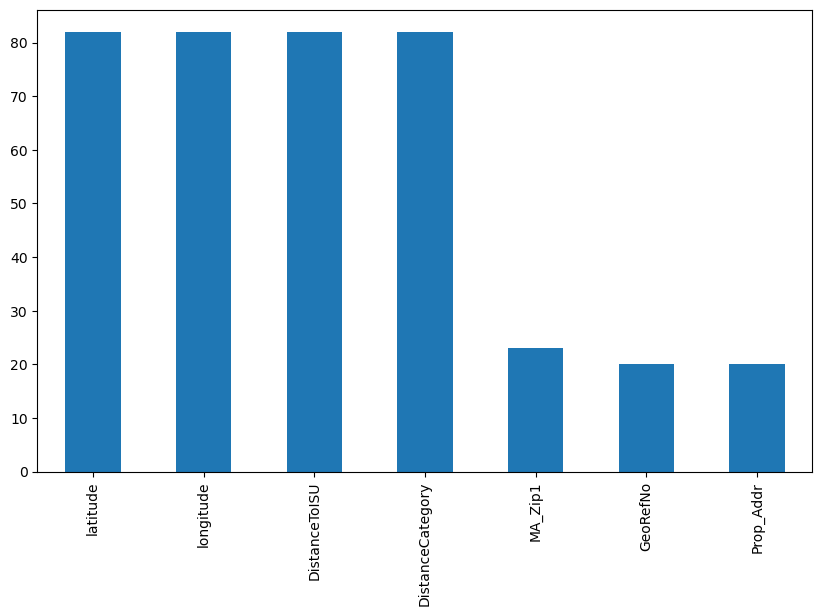

In [271]:
missing_values=housing_coordinates.isna().sum()
missing_values_features=missing_values[missing_values>0].sort_values(ascending=False)

missing_values_features.plot(kind='bar', figsize=(10,6))

In [272]:
housing_coordinates = housing_coordinates.dropna()
housing_coordinates['DistanceCategory'] = housing_coordinates['DistanceCategory'].astype(int)

/tmp/ipykernel_100951/2355724606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_coordinates['DistanceCategory'] = housing_coordinates['DistanceCategory'].astype(int)


In [273]:
housing_coordinates.to_csv('data/ames_final.csv', index=False)

In [274]:
#housing_coordinates